##***Analysis of Each Feature***
#1.Variance:-
Interpretation: Variance measures the dispersion of pixel intensities in the image. A higher variance could indicate more complexity in the texture, which might be associated with genuine banknotes.\
Effect: If genuine banknotes have a higher variance compared to fake ones, the model can use this feature to distinguish between the two classes.\
#2.Skewness:-
Interpretation: Skewness measures the asymmetry of the pixel intensity distribution. A high positive or negative skewness might indicate specific patterns or anomalies.\
Effect: Different skewness values for genuine and fake banknotes can help the model make predictions.
#3.Curtosis:-
Interpretation: Curtosis measures the "tailedness" of the distribution of pixel intensities. High curtosis indicates more outliers, which might be more prevalent in one class.\
Effect: If fake banknotes have a higher curtosis, it can be a strong indicator for the model.\
#4.Entropy:-
Interpretation: Entropy measures the randomness or complexity of the image. Higher entropy might indicate more intricate details, which are usually harder to counterfeit.\
Effect: The model can leverage the entropy differences to classify the banknotes

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

##Load BankNote dataset

In [5]:
df=pd.read_csv('/content/Banknote_dataset.csv', header=None)
df.head()

,0,1,2,3,4
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
#shape of datset
df.shape

(1372, 5)

In [7]:
# Assign proper column names based on the provided attribute information
column_names = [
    'variance', 'skewness', 'curtosis', 'entropy', 'class'
]

In [8]:
#apply column name in dtaset
df.columns = column_names

In [9]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


##Data Overviews

In [10]:
# Summary statistics
print(df.describe())

          variance     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000


In [11]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [12]:
#check the missing values
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

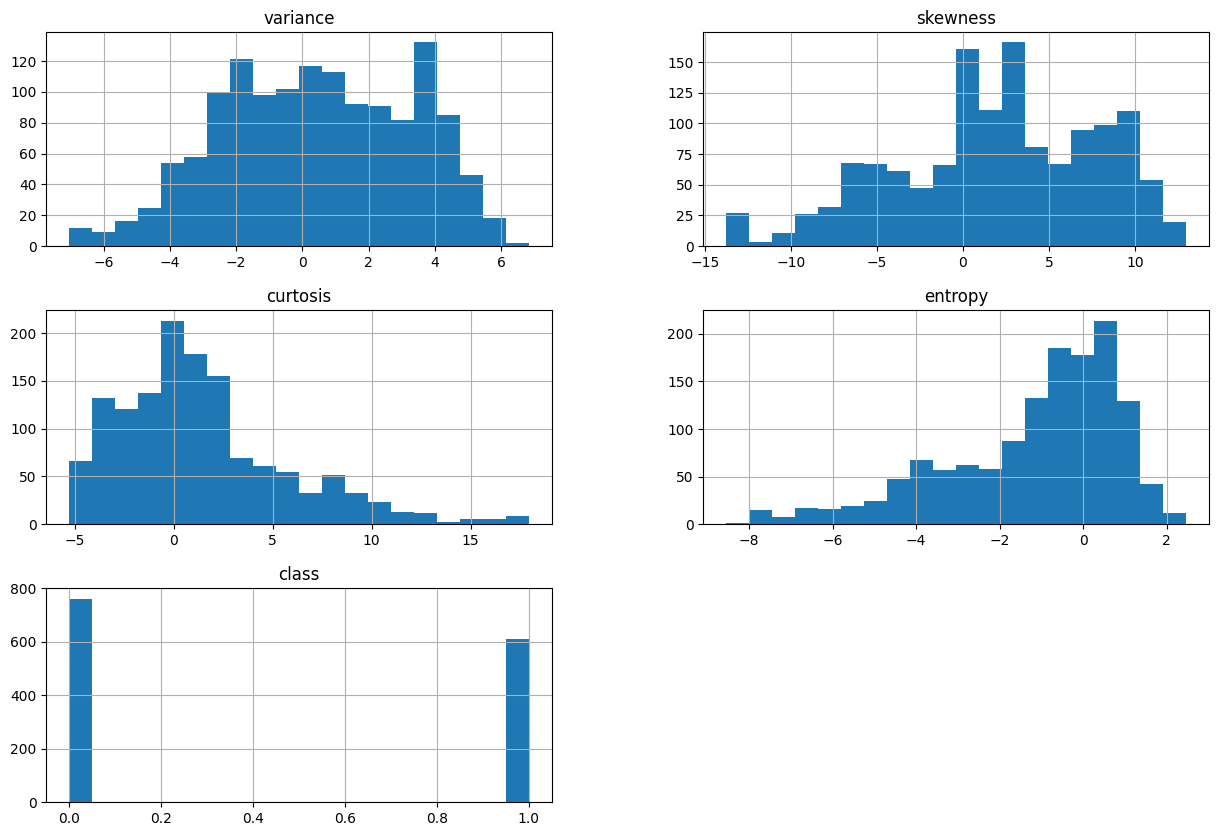

In [13]:
# Histograms for numerical features
df.hist(figsize=(15, 10), bins=20)
plt.show()

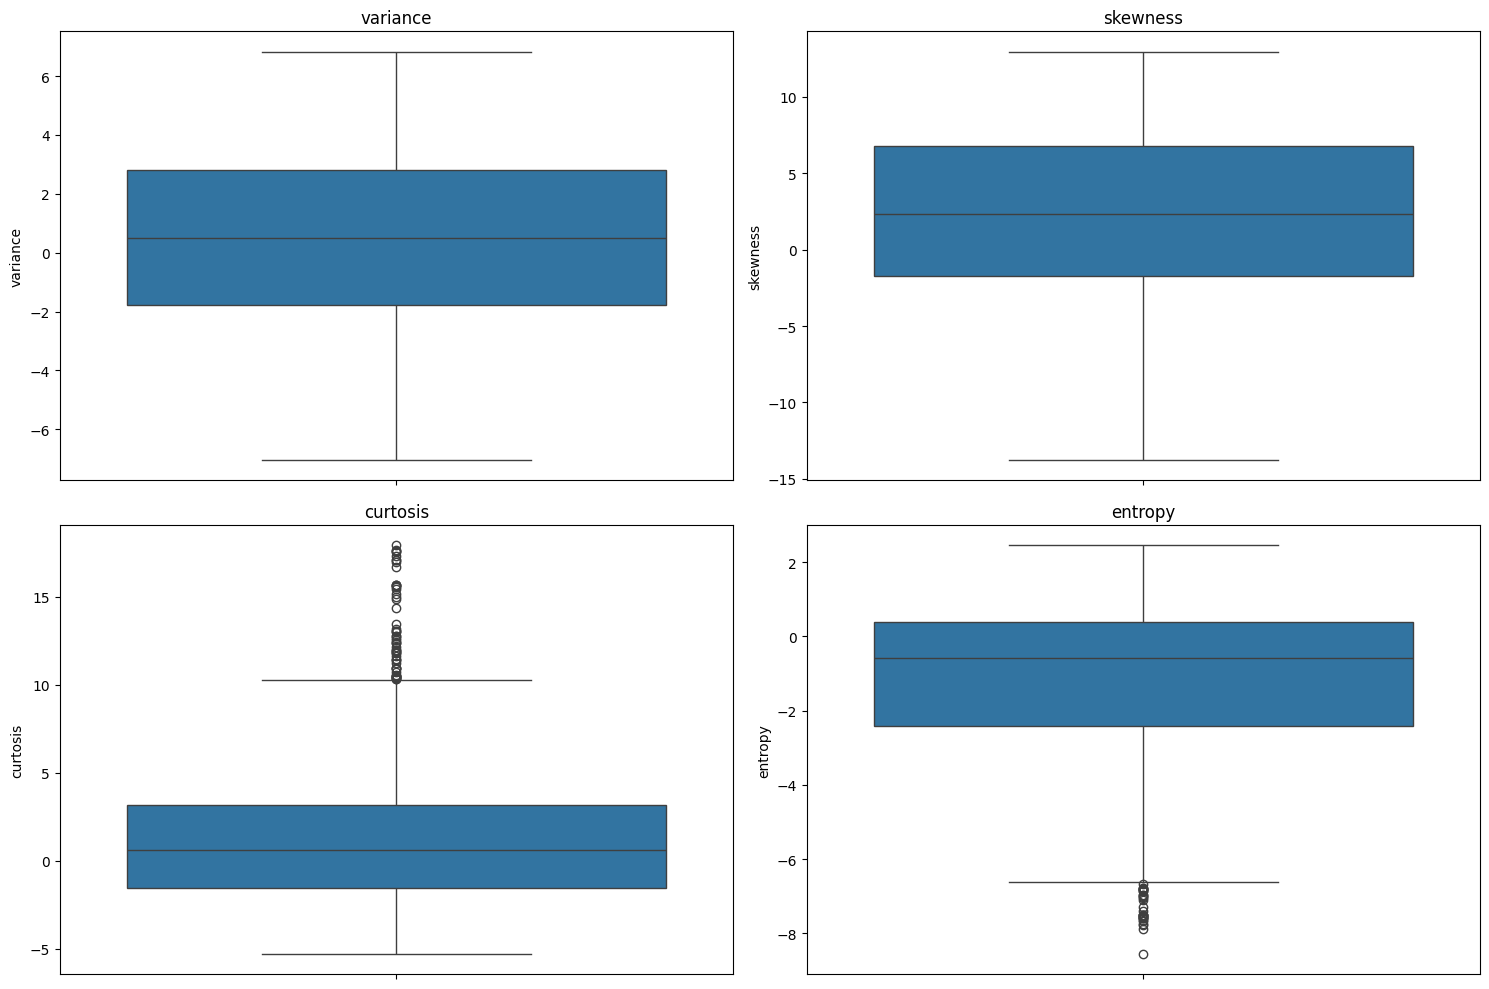

In [14]:
# Box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

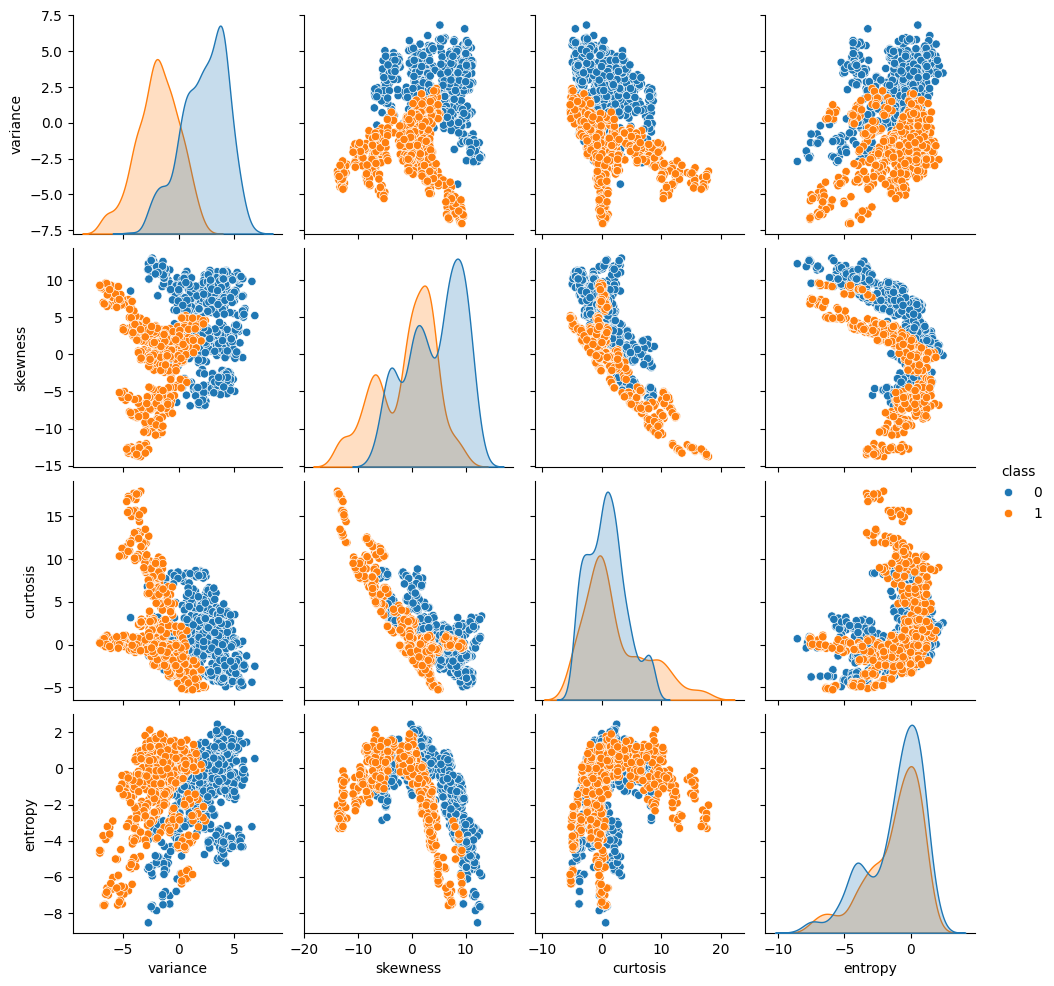

In [15]:
# Pairplot for all numerical features
sns.pairplot(df, hue='class')
plt.show()

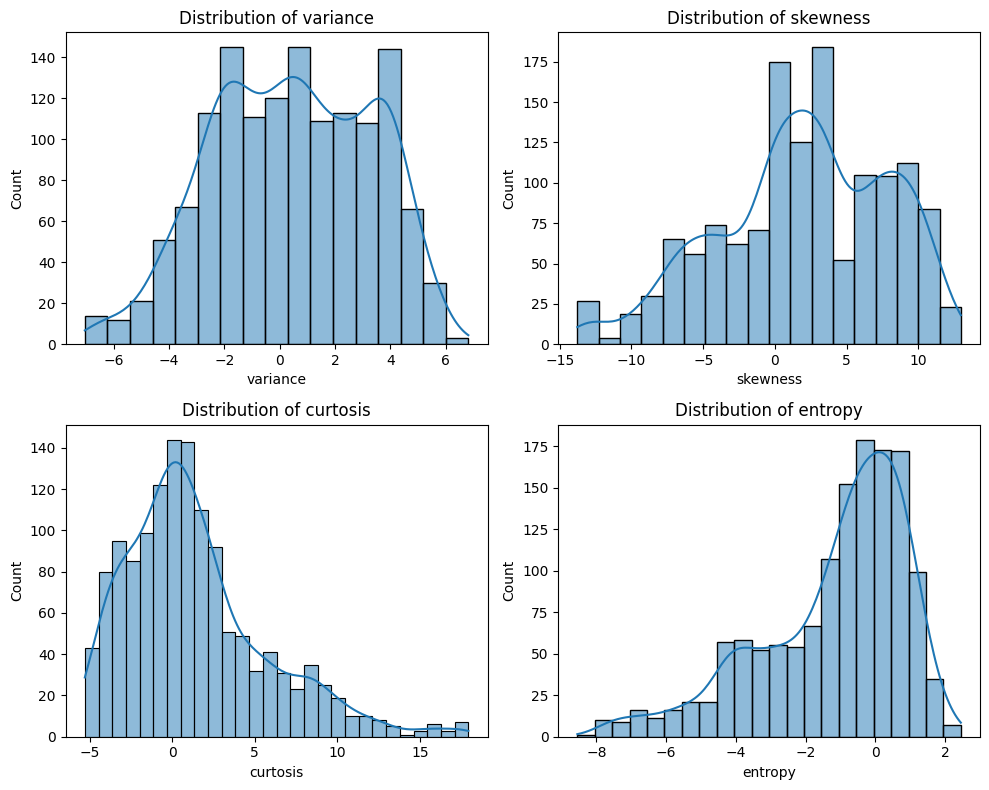

In [32]:
# Histograms for each feature
features = ['variance', 'skewness', 'curtosis', 'entropy']
plt.figure(figsize=(10, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

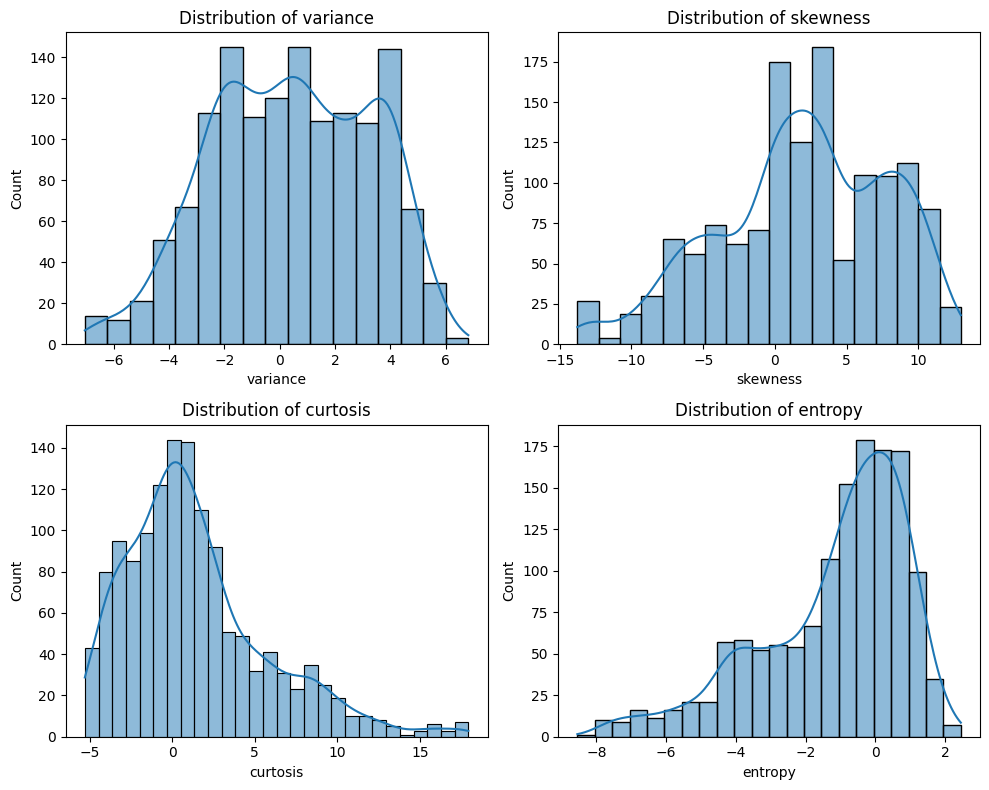

In [33]:
# Histograms for each feature
features = ['variance', 'skewness', 'curtosis', 'entropy']
plt.figure(figsize=(10, 8))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

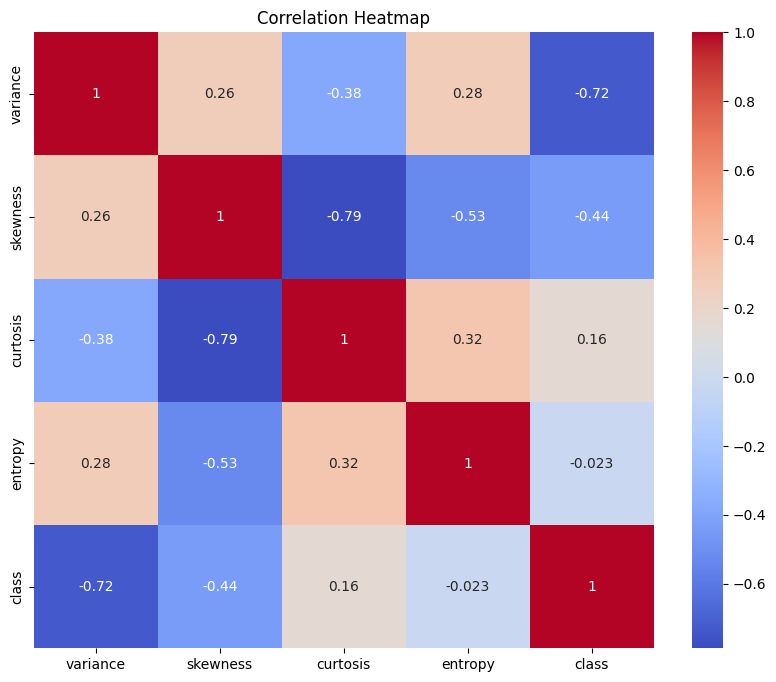

In [16]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

*Entropy does not effect on class as per correlation matrix

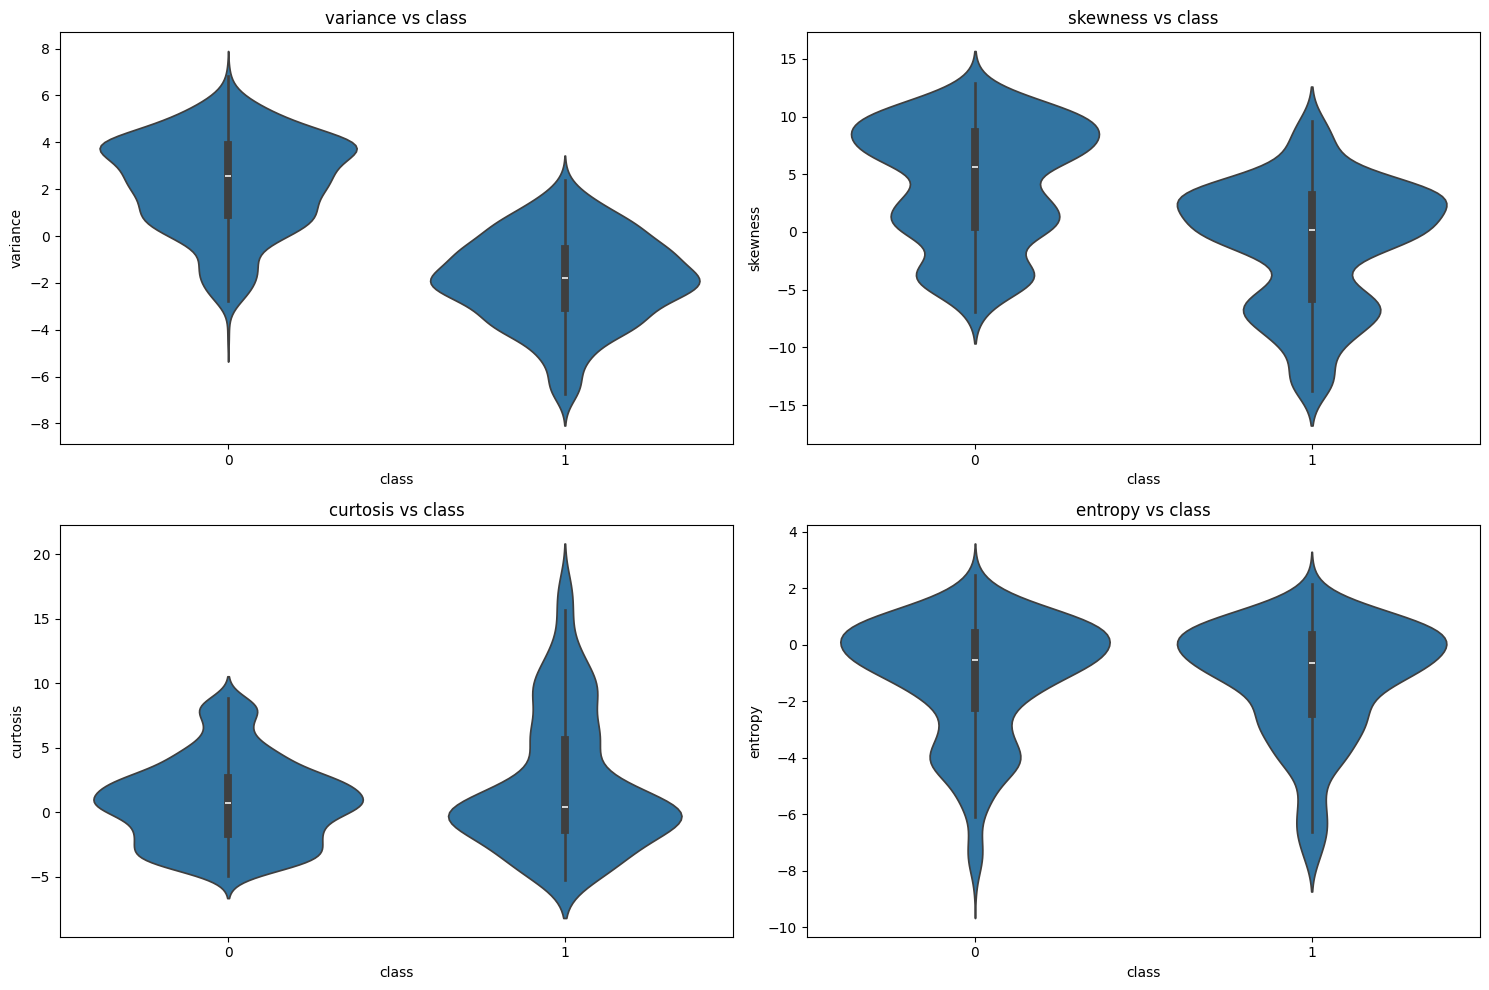

In [17]:
# Violin plots for numerical features against class
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x=df['class'], y=df[col])
    plt.title(f'{col} vs class')
plt.tight_layout()
plt.show()

##Splitting the Dataset in X,y

In [22]:
# Define features and target=class
X = df.drop('class', axis=1)
y = df['class']

In [23]:
# Split the dataset into training and testing sets
X_train,X_test,y_train,y_test =train_test_split(X, y, test_size=0.3, random_state=42)

## ***Model Training and Evaluation***

In [25]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy: {lr_accuracy:.2f}')
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.99
[[226   3]
 [  2 181]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       229
           1       0.98      0.99      0.99       183

    accuracy                           0.99       412
   macro avg       0.99      0.99      0.99       412
weighted avg       0.99      0.99      0.99       412



In [26]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {dt_accuracy:.2f}')
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.98
[[228   1]
 [  7 176]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       229
           1       0.99      0.96      0.98       183

    accuracy                           0.98       412
   macro avg       0.98      0.98      0.98       412
weighted avg       0.98      0.98      0.98       412



In [27]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy:.2f}')
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 1.00
[[229   0]
 [  2 181]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       229
           1       1.00      0.99      0.99       183

    accuracy                           1.00       412
   macro avg       1.00      0.99      1.00       412
weighted avg       1.00      1.00      1.00       412



#evaluate model

In [28]:
# Determine the best model based on accuracy
best_model = 'Random Forest' if rf_accuracy > dt_accuracy and rf_accuracy > lr_accuracy else 'Decision Tree' if dt_accuracy > lr_accuracy else 'Logistic Regression'
print(f'Best Model: {best_model}')

Best Model: Random Forest


In [31]:
#Save the trained model for future use. /export the model to apply forther
import pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

##After saving the model then load the model to detect new data on bankNote Fake or Genuine
##example as random to detect

In [35]:
# Load the model from the file
with open('best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)


In [36]:
#example of new data on Banmk note scan check it if fake or Genuine
new_data = pd.DataFrame({
    'variance': [3.5],
    'skewness': [8.1],
    'curtosis': [-2.6],
    'entropy': [-0.4]
})

#Use the model to predict whether this new banknote is genuine or fake

In [37]:
# Predict the class of the new data
prediction = loaded_model.predict(new_data)
print('Prediction:', 'Genuine' if prediction[0] == 0 else 'Fake')

Prediction: Genuine


##***conclusion:-***
-Best model to find the prediction of Authenticate bank Note from fake note.\
-By performing these EDA steps and visualizations, we can observe how each feature affects the prediction of whether a banknote is fake or genuine. The boxplots and violin plots help us see the distribution of each feature with respect to the target class. Pairplots show us the relationships between features, and the correlation heatmap provides insights into the linear relationships among them.